In [118]:
# Importing Required Modules

## Mathematical functions from the standard library
# https://docs.python.org/3/library/math.html  
import math 

## Numerical structures and operations
# https://numpy.org/doc/stable/reference/index.html  
import numpy as np 

## Plotting
# https://matplotlib.org/stable/contents.html  
import matplotlib.pyplot as plt

## Random selections
# https://docs.python.org/3/library/random.html  
import random

## Permutations and combinations
# https://docs.python.org/3/library/itertools.html  
import itertools


### Statistics
import scipy.stats as stats  
import seaborn as sns 
import statistics

# Task 1

Task 1 - Permutations and Combinations  
Completed by: Rebecca Feeley  

Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

## Task 1  Explanation and Planned Solution
This task is a proposed expansion of the famous Lady Tasting Tea test to involve 12 cups of tea, 6 of which have the milk added in first and 6 of which have the tea added in first.

This experiment, conducted and published by Ronald Fisher in 1935, set out to determine how the cups of tea should be prepared (i.e should they be randomised) in order to establish that the lady had a genuine ability to tell how the cups of tea were prepared rather than lucky guesses on the part of the lady.   
A key aspect of this experiment is the idea of the null hypothesis - that is an initial statement, as close to the real world application as possible, which is treated as true until it is proven otherwise. Fisher's null hypothesis was that the lady testing the tea did not have any unique ability to determine how the tea was prepared and that her claim to be able to do so was based on chance (i.e 'lucky guesses').    
Fisher firstly set out to determine the probability of idenifying the correct preparation of each cup based on chance alone. He determined this to be approximately 1 in 70. As the chance of the lady correctly idenitifying each cup was so low, when the lady correctly determined the preparation process of each cup, Fisher was then able to reject the null hypothesis and concluded that "her ability to discern the tea preparation was statistically significant."
However, as the lady was able to correctly determine the preparation process of each cup, Fisher rejected the null hypothesis.   


The first part of this task invloves calculating the probability that the person guesses each of the cups by chance, as Fisher set out to determine. 







In [119]:
# Number of cups of tea in total.
no_cups_total = 12

# Number of cups of tea with milk added first.
no_cups_milk_first = 6

# Number of cups of tea with tea added first.
no_cups_tea_first = 6

I have imported the math module to use the comb function to calculate the number of ways to choose k elements from a set of n elements where the order of the chosen elements does not matter and no element is selected more than once.
In this case, k elements refers to number of cups with milk added first and n elements is the total amount of cups.  

In [120]:
# Number of ways of selecting six cups from twelve using comb function
ways = math.comb(no_cups_total, no_cups_milk_first)

print ("The number of ways of selecting six cups from twelve is:", ways)

# This function could also be used to select six cups from twelve (i.e the six cups with the tea added first)

The number of ways of selecting six cups from twelve is: 924


Now that we have established how many ways of choosing six cups from twelve exist, we will look at the probability that a person tasting the tea would choose the correct six cups purely by chance. 

In [121]:
# To get the probability of choosing the correct six cups, we divide 1 by the number of ways 
# of selecting 6 separate cups from twelve
# We divide into 1 as this is considered the correct conbination, and we divide into this by the total number of combinations
# in order to get the probability of choosing the correct cups.

correct_guess = 1
probability_all_correct = correct_guess/ways 
print(f"Probability of selecting the correct 6 cups: {probability_all_correct:.10f}")

Probability of selecting the correct 6 cups: 0.0010822511


Another way to show the to demonstrate the different ways of selecting the cups with milk first out of the cups of tea (i.e selecting six cups out of 12 cups) is to give each cup a label

In [122]:
# assigning a label to each cup
labels = list(range(no_cups_total))

print("Each cup is labelled:", labels)

# Show the different ways of selecting cups with milk first out of the cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# 'combs' is commented out for clarity as it gives a long list of each of the ways of selecting 6 out of 12 cups
# combs

# Number of combinations of choosing 6 cups out of 12
len(combs)

Each cup is labelled: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


924

As is demonstrated above, there are 924 different ways of choosing 6 cups out of 12 cups. 

In order to determine the likelihood of the person making at most one error, I will simulate the guessing process of the lady by randomly assigning 6 cups out of the 12 to have the milk added first. 
Then, for each guessed set of six cups, I will determine how many of these cups match with the actual set of 6 cups chosen to have the milk added first. 

In [123]:
# Select six cups at random which have the milk added first (this changes each time the program is ran to ensure randomness)
labels_milk = random.sample(labels, 6)

# Putting the labels in order using the sort() function
labels_milk.sort()
print("The cups with milk added first are labelled:", labels_milk)


# creating a list to store the number of overlaps
no_overlaps = []

# using the for function to iterate through each combination in comb
for comb in combs:
    # Turn comb and labels_milk into sets.
    s1 = set(comb)
    s2 = set(labels_milk)
    # Determine where they overlap i.e the number of correct guesses in each combination
    overlap = s1.intersection(s2)
    # Adding the overlap to no_overlaps list
    no_overlaps.append(len(overlap))

# Count the number of times each overlap occurs
unique, counts = np.unique(no_overlaps, return_counts=True)

print("Number of correct guesses for each label : Frequency")
for u, c in zip(unique, counts):
    print(f"{u} : {c}")


The cups with milk added first are labelled: [0, 2, 5, 6, 8, 9]
Number of correct guesses for each label : Frequency
0 : 1
1 : 36
2 : 225
3 : 400
4 : 225
5 : 36
6 : 1


The results of the overlap code demonstrate the likelihood of how many correct cups a person will identify if guessing blindly. A person incorrectly identifying all cups with milk added first and correctly identifying all cups with milk added first are the most unlikely outcomes. 
A person determining 3 out of the 6 cups with milk added correctly is the most likely outcome.

## Visualising the results of the above code

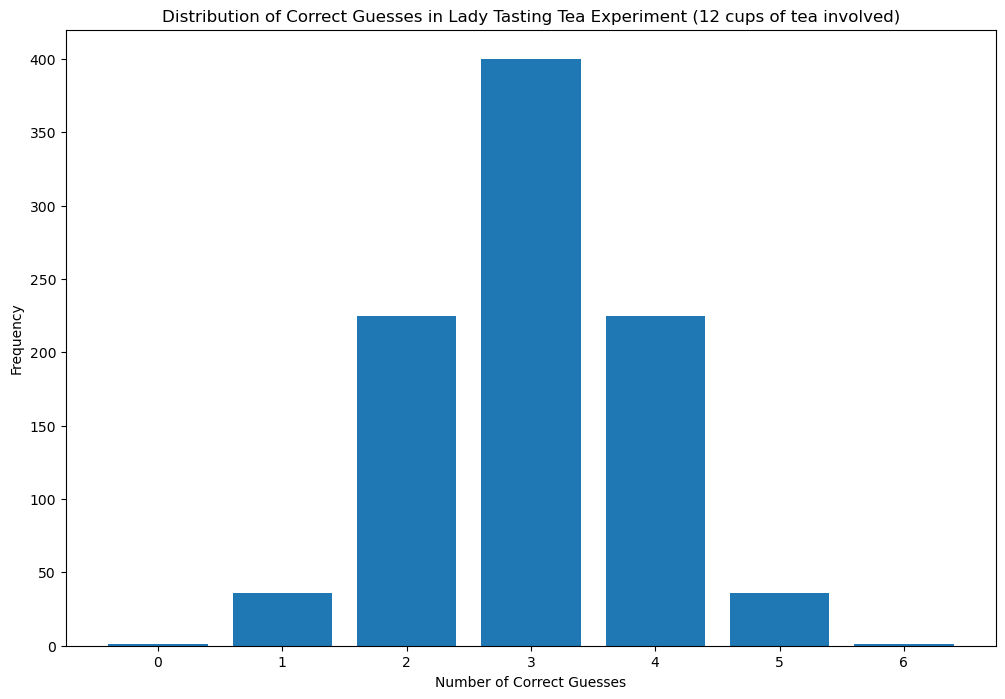

In [124]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(unique, counts)
ax.set_xlabel('Number of Correct Guesses')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Correct Guesses in Lady Tasting Tea Experiment (12 cups of tea involved)')
plt.show()

Now I will look at the probability of getting at most one error. The above code and bar chart shows the likelihood of getting 5 cups correct is 36. Thus, in order to determine the probability, of at most one error, this means the person could also make no error. 
So, it is the frequency of choosing 5 cups correct (36) and the frequency of choosing all cups correctly (1), divided by the total number of ways of choosing 6 cups. 

In [125]:
# Frequencies of getting 5 and 6 cups correct
count_5_correct = 36
count_6_correct = 1

# Probability of making at most one error
probability_one_or_less_errors = (count_5_correct + count_6_correct) / ways
print(f"Probability of making at most one error: {probability_one_or_less_errors:.10f}")


Probability of making at most one error: 0.0400432900


The problem also asks if I could accept 2 errors, so I am going to calculate the person making two errors when choosing the cups with milk added first.

In [126]:
# Frequencies of getting 5 and 6 cups correct
count_4_correct = 225


# Probability of making at most one error
probability_one_or_less_errors = (count_4_correct) / ways
print(f"Probability of making two errors: {probability_one_or_less_errors:.10f}")

Probability of making two errors: 0.2435064935


## Analysis of the probabilities

Firstly, looking at the probability of the lady choosing all 6 cups correctly is 0.0010822511 (i.e 1 in 924). As this is a very low probability of the lady simply guessing all 6 cups correctly, we could reject the null hypothesis that she has no special ability to determine which cups of tea had milk added first.   

Secondly, the probability of the lady making at most one error (i.e choosing at least 5 cups correctly or choosing all 6 cups correctly), is 0.0400432900. Again, this is a very low probability and again we could reject the null hypothesis.  

However, if the we look at the probability of lady making two errors (i.e choosing 4 cups correctly), the probability is 0.2435064935. This is an almost 1 in 4 chance (almost 25%) of her guessing 4 cups correctly. Thus, this probability is much higher and the likelihood of the woman simply guessing 4 cups correctly could be said to be more reasonably possible.


## Task 1 References 

https://www.acsh.org/news/2017/11/08/how-statistics-came-be-woman-and-cup-tea-12080#:~:text=With%2070%20possible%20combinations%2C%20there%20is%20exactly%20one,high%20to%20distinguish%20lucky%20guessing%20from%20actually%20knowing. 

https://statisticseasily.com/lady-tasting-tea/

https://docs.python.org/3/library/random.html#random.sample

# Task 2

In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.  

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.  

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.  

## Import required modules

In [127]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats

######
In order to check if the function numpy.random.normal() correctly generates normal values, I will complete the following:  
Firstly, I will generate a sample of one hundred thousand values using the function. The mean will be set at 10.0 and the standard deviation set to 3.0  
Then, I will use the scipy.stats.shapiro() function to test if the sample originates from a normal distribution.
I will then create a histogram of the generated values and overlay this with the probability density function of the corresponding normal distribution.

In [ ]:
# I am generating a sample of one hundred thousand values with mean 10.0 and standard deviation 3.0
mean = 10.0
std_dev = 3.0
sample_size = 100000
sample_data = np.random.normal(loc=mean, scale=std_dev, size=sample_size)

print("The sample data is:", sample_data)

The sample data is: [10.96149452 11.38034746  5.89257957 ... 13.50682854 10.00004368
 14.69042033]
